In [78]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [85]:
def get_response():
    print("Welcome to the COVID Data Tracker. Enter the date you would like to see: ")
    year = input("Year (YYYY): ")
    month = input("Month (MM): ")
    day = input("Day (DD): ")
    date_time_str = "{}{}{}".format(year,month,day)
    date_time_obj = datetime.strptime(date_time_str, '%Y%m%d')
    print(date_time_str)
    print(date_time_obj.date())
    response = requests.get("https://api.covidtracking.com/v1/us/{}{}{}.json".format(year,month,day))
    return response

In [86]:
response = get_response()
print(response.json())

Welcome to the COVID Data Tracker. Enter the date you would like to see: 
20200502
2020-05-02
{'date': 20200502, 'states': 56, 'positive': 1135275, 'negative': 2491161, 'pending': 1639, 'hospitalizedCurrently': 54008, 'hospitalizedCumulative': 55430, 'inIcuCurrently': 13528, 'inIcuCumulative': 4386, 'onVentilatorCurrently': 4846, 'onVentilatorCumulative': 375, 'dateChecked': '2020-05-02T24:00:00Z', 'death': 62979, 'hospitalized': 55430, 'totalTestResults': 7244219, 'lastModified': '2020-05-02T24:00:00Z', 'recovered': None, 'total': 0, 'posNeg': 0, 'deathIncrease': 1521, 'hospitalizedIncrease': 1276, 'negativeIncrease': 80894, 'positiveIncrease': 29151, 'totalTestResultsIncrease': 272341, 'hash': 'dabc8fb5e0128fe0e7929f1b1b375e755276ef36'}


In [81]:
print(response.json()['positive'])

1135275


In [82]:
def return_data():
    date = response.json()['date']
    states_infected = response.json()['states']
    positive = response.json()['positive']
    negative = response.json()['negative']
    currently_hospitalized = response.json()['hospitalizedCurrently']
    print("States infected: " + str(states_infected))
    print("Covid positive: " + str(positive))
    print("Tested Covid negative: " + str(negative))
    print("Currently hospitalized: " + str(currently_hospitalized))
return_data()

States infected: 56
Covid positive: 1135275
Tested Covid negative: 2491161
Currently hospitalized: 54008


In [83]:
N = 1

covidPositive = (response.json()["positive"])
covidNegative = (response.json()["negative"])
total = (covidNegative + covidPositive)
percentPositive = round((covidPositive / total) * 100,2)
percentNegative = 100 - percentPositive
ind = np.arange(N)
width = 0.35

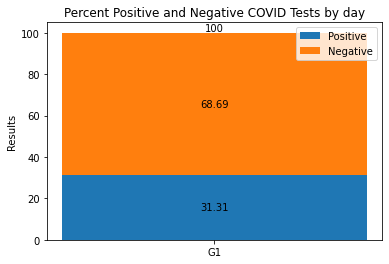

In [84]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, percentPositive, width, label='Positive')
p2 = ax.bar(ind, percentNegative, width,
            bottom=percentPositive, label='Negative')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Results')
ax.set_title('Percent Positive and Negative COVID Tests by day')
ax.set_xticks(ind, labels=['G1'])
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()